In [14]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub

In [2]:
# Carregar a base de dados

path = kagglehub.dataset_download("ahmedmohamed2003/quality-of-life-for-each-country")
os.environ['KAGLE_CONFIG_DIR'] = '/content'
print("Path to dataset files:", path)
os.listdir(path)

100%|██████████| 9.19k/9.19k [00:00<00:00, 3.28MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ahmedmohamed2003/quality-of-life-for-each-country/versions/1


['Quality_of_Life.csv']

In [11]:
path = '/root/.cache/kagglehub/datasets/ahmedmohamed2003/quality-of-life-for-each-country/versions/1'
df_qualidade_de_vida = pd.read_csv(path + '/Quality_of_Life.csv')

## Propriedades dos dados:

In [12]:
df_qualidade_de_vida.head()

,country,Purchasing Power Value,Purchasing Power Category,Safety Value,Safety Category,Health Care Value,Health Care Category,Climate Value,Climate Category,Cost of Living Value,Cost of Living Category,Property Price to Income Value,Property Price to Income Category,Traffic Commute Time Value,Traffic Commute Time Category,Pollution Value,Pollution Category,Quality of Life Value,Quality of Life Category
0,Afghanistan,32.15,'Very Low',25.33,'Low',24.24,'Low',0.00,NaN,21.08,'Very Low',7.8,'Low',56.17,'Very High',84.44,'Very High',0.0,NaN
1,Aland Islands,125.01,'Very High',71.81,'High',79.72,'High',0.00,NaN,53.44,'Low',5.33,'Low',19.05,'Very Low',18.05,'Very Low',0.0,NaN
2,Albania,42.82,'Low',55.52,'Moderate',48.21,'Moderate',86.43,'Very High',40.85,'Low',14.88,'High',36.74,'Moderate',77.25,'High',': 104.16','Low'
3,Alderney,0.00,NaN,83.79,'Very High',100.00,'Very High',0.00,NaN,0.00,NaN,0.0,NaN,5.00,'Very Low',1.72,'Very Low',0.0,NaN
4,Algeria,27.60,'Very Low',47.54,'Moderate',54.43,'Moderate',94.82,'Very High',25.31,'Very Low',21.7,'Very High',45.09,'High',63.87,'High',': 98.83','Very Low'


In [9]:
df_qualidade_de_vida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country                            236 non-null    object 
 1   Purchasing Power Value             236 non-null    float64
 2   Purchasing Power Category          190 non-null    object 
 3   Safety Value                       236 non-null    float64
 4   Safety Category                    234 non-null    object 
 5   Health Care Value                  236 non-null    float64
 6   Health Care Category               221 non-null    object 
 7   Climate Value                      236 non-null    float64
 8   Climate Category                   114 non-null    object 
 9   Cost of Living Value               236 non-null    float64
 10  Cost of Living Category            191 non-null    object 
 11  Property Price to Income Value     236 non-null    object 

In [10]:
df_qualidade_de_vida.isnull().sum()

,0
country,0
Purchasing Power Value,0
Purchasing Power Category,46
Safety Value,0
Safety Category,2
Health Care Value,0
Health Care Category,15
Climate Value,0
Climate Category,122
Cost of Living Value,0


## Explorando os dados:

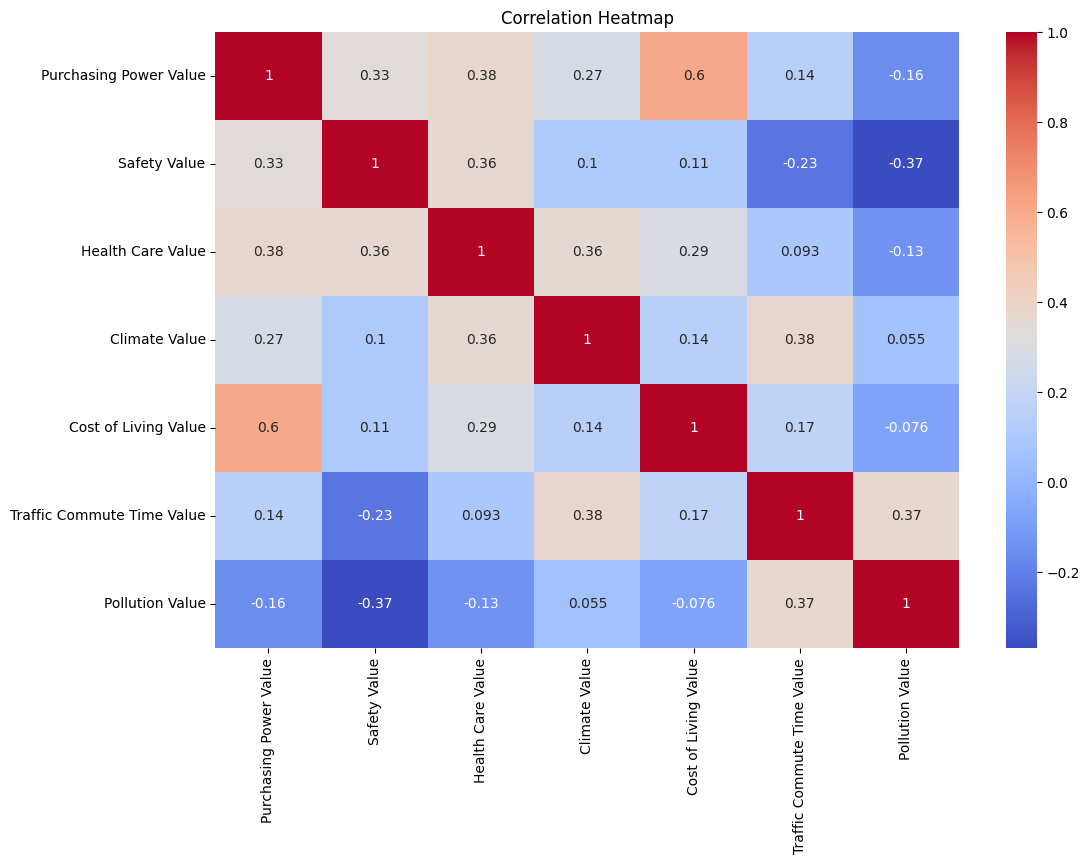

In [15]:
# Gerando mapa de calor

numeric_df = df_qualidade_de_vida.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

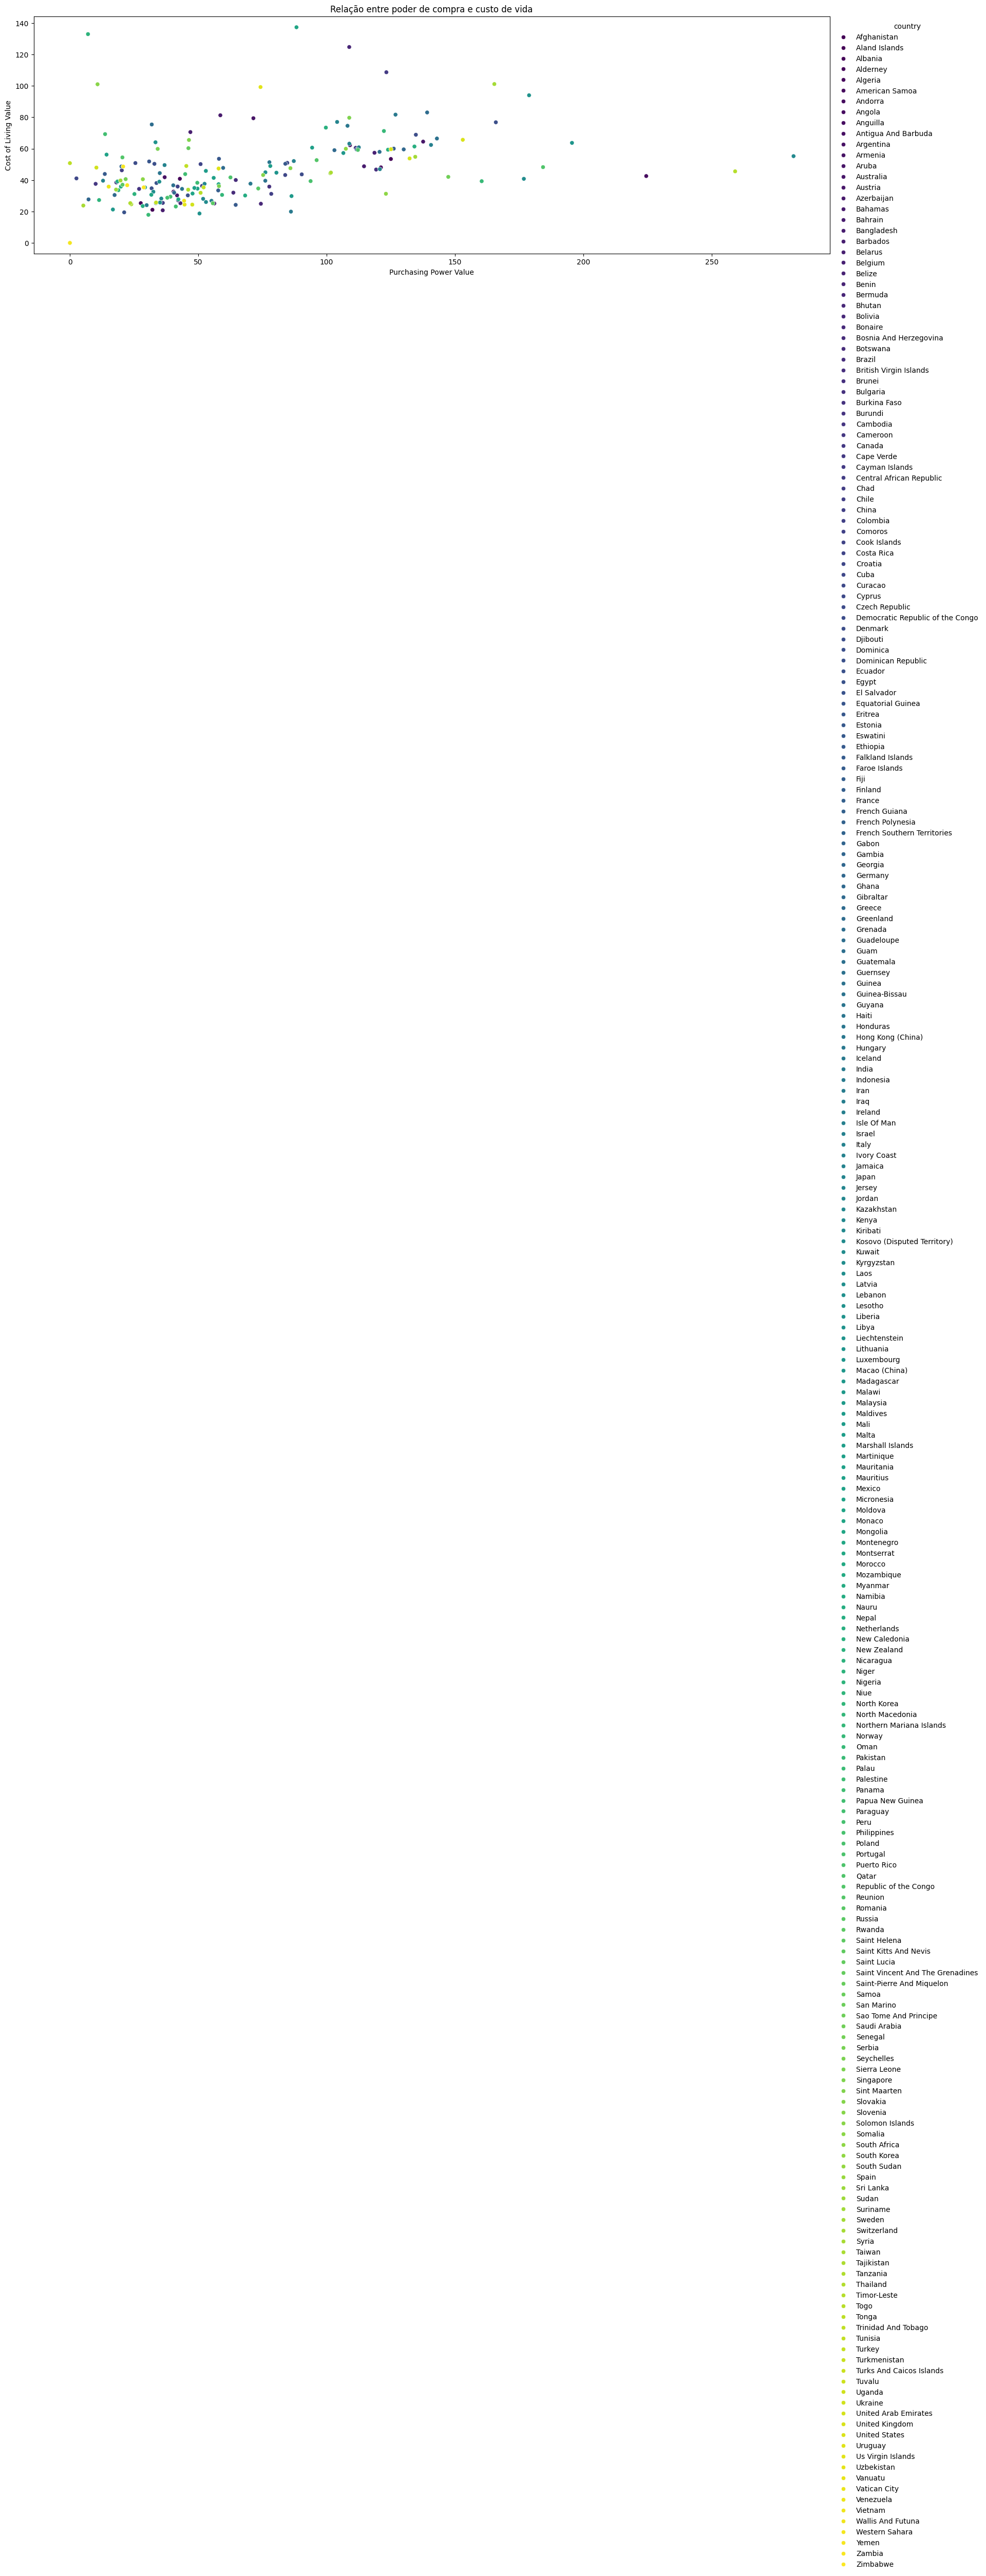

In [17]:
# Verificando a relação entre as variáveis

plt.figure(figsize=(20, 6))
sns.scatterplot(data=df_qualidade_de_vida, x='Purchasing Power Value', y='Cost of Living Value', hue='country', palette='viridis')
plt.title('Relação entre poder de compra e custo de vida')
plt.xlabel('Purchasing Power Value')
plt.ylabel('Cost of Living Value')
plt.legend(title='country', loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=10)
plt.show()

In [20]:
# Como temos muitos países o gráfico fica ruim para qualquer tipo de analise
# Vamos descobrir quantos países temos e depois olhar para os top 10

# Contar o número de países únicos na coluna 'country'
num_paises = df_qualidade_de_vida['country'].nunique()

# Exibir o número de países
print(f'Número de países únicos: {num_paises}')


Número de países únicos: 236


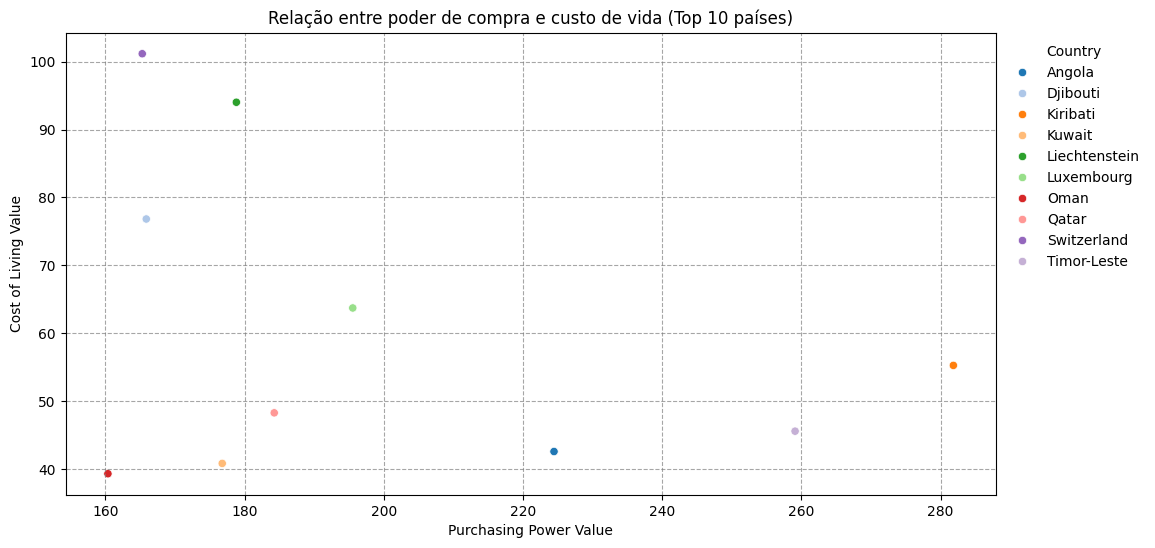

In [24]:
# Selecionando os top 10 países com maior 'Purchasing Power Value'
top_countries = df_qualidade_de_vida.groupby('country')['Purchasing Power Value'].mean().sort_values(ascending=False).head(10).index

# Filtrando o DataFrame para manter apenas esses países
df_top_countries = df_qualidade_de_vida[df_qualidade_de_vida['country'].isin(top_countries)]

# Plotando o gráfico novamente com a filtragem
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_top_countries, x='Purchasing Power Value', y='Cost of Living Value', hue='country', palette='tab20')
plt.title('Relação entre poder de compra e custo de vida (Top 10 países)')
plt.grid(True, axis='both', linestyle='--', color='gray', alpha=0.7)
plt.xlabel('Purchasing Power Value')
plt.ylabel('Cost of Living Value')
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=10)
plt.show()


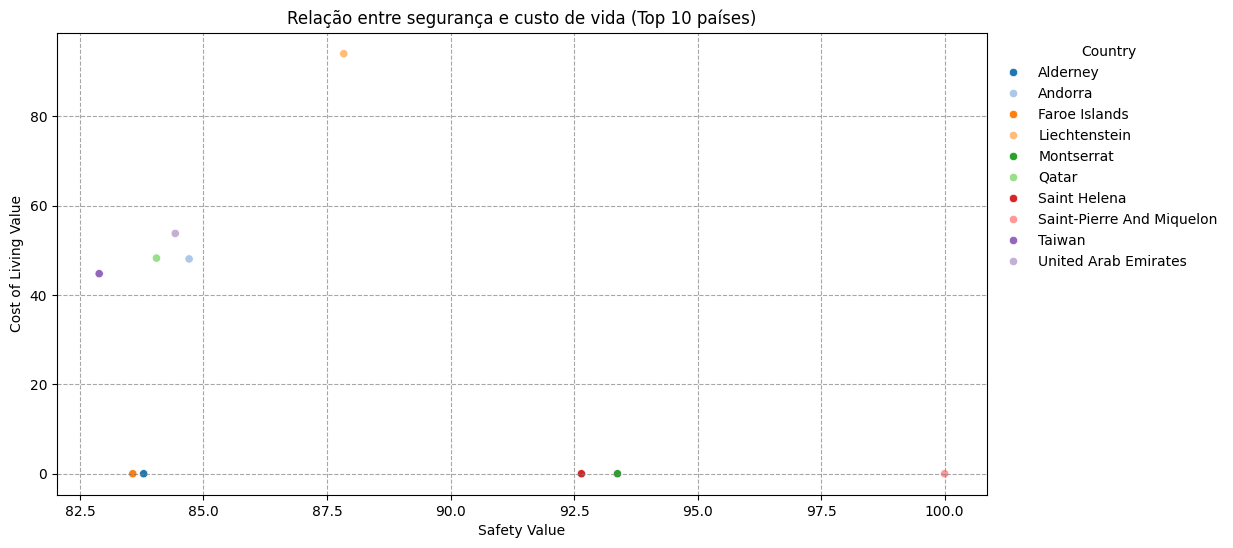

In [25]:
# Selecionando os top 10 países com maior 'Safety Value'
top_countries = df_qualidade_de_vida.groupby('country')['Safety Value'].mean().sort_values(ascending=False).head(10).index

# Filtrando o DataFrame para manter apenas esses países
df_top_countries = df_qualidade_de_vida[df_qualidade_de_vida['country'].isin(top_countries)]

# Plotando o gráfico novamente com a filtragem
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_top_countries, x='Safety Value', y='Cost of Living Value', hue='country', palette='tab20')
plt.title('Relação entre segurança e custo de vida (Top 10 países)')
plt.grid(True, axis='both', linestyle='--', color='gray', alpha=0.7)
plt.xlabel('Safety Value')
plt.ylabel('Cost of Living Value')
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=10)
plt.show()

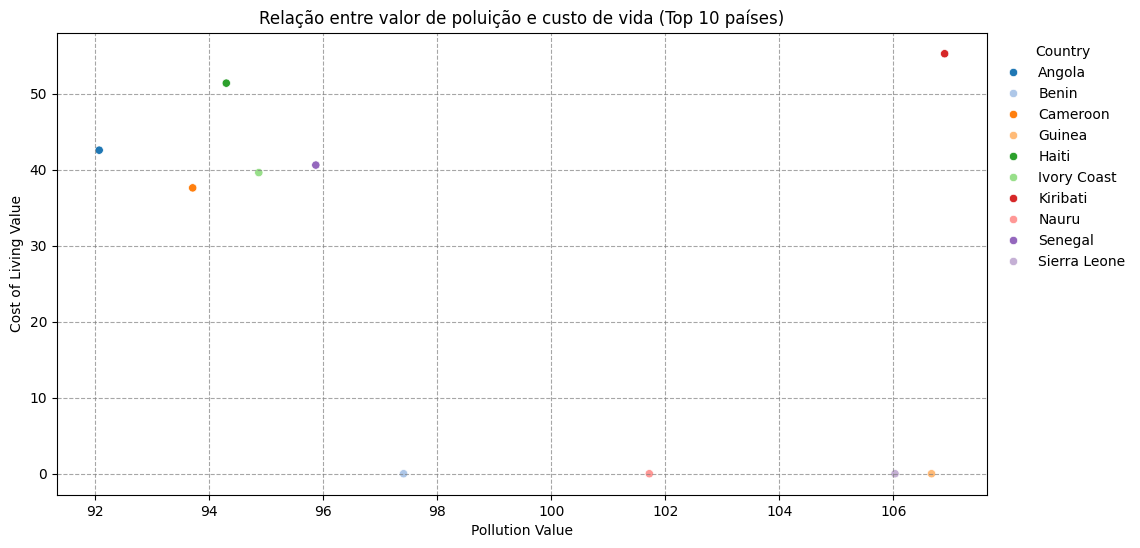

In [28]:
# Selecionando os top 10 países com maior 'Quality of Life Value'
top_countries = df_qualidade_de_vida.groupby('country')['Pollution Value'].mean().sort_values(ascending=False).head(10).index

# Filtrando o DataFrame para manter apenas esses países
df_top_countries = df_qualidade_de_vida[df_qualidade_de_vida['country'].isin(top_countries)]

# Plotando o gráfico novamente com a filtragem
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_top_countries, x='Pollution Value', y='Cost of Living Value', hue='country', palette='tab20')
plt.title('Relação entre valor de poluição e custo de vida (Top 10 países)')
plt.grid(True, axis='both', linestyle='--', color='gray', alpha=0.7)
plt.xlabel('Pollution Value')
plt.ylabel('Cost of Living Value')
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=10)
plt.show()